## Importing Libraries

In [94]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style= 'white', color_codes= True)


##Loading DataSet


In [95]:
data = pd.read_csv("//content/drive/MyDrive/Datasets/SeoulBikeData.csv")
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


##Extracting dataframe for only 'number' datatypes

In [96]:
df = data.select_dtypes(include= ['float64','int64'])

In [97]:
df

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind_speed_(m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


##Checking Missing Value

In [98]:
df.isnull().sum()

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind_speed_(m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
dtype: int64

##Checking Columns

In [99]:
df.columns


Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind_speed_(m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

##Removing Outliers

In [100]:
df.rename(columns = {'Wind speed (m/s)':'Wind_speed_(m/s)'},inplace = True)

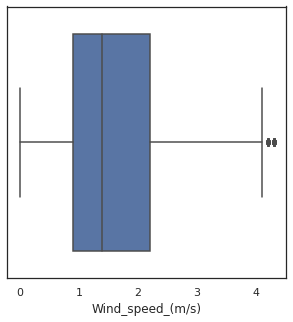

In [101]:
plt.figure(figsize = (5,5))
sns.boxplot(df['Wind_speed_(m/s)'])
plt.show()

In [102]:
Q1 , Q2 , Q3 = np.percentile(df['Wind_speed_(m/s)'],[25 , 50, 75])

In [103]:
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)

print(low_lim, up_lim)

-1.0500000000000003 4.15


In [104]:
df = df[df['Wind_speed_(m/s)']<up_lim]
df = df[df['Wind_speed_(m/s)']>low_lim]



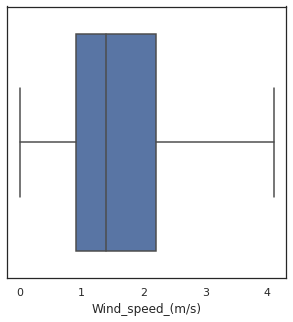

In [105]:
plt.figure(figsize = (5,5))
sns.boxplot(df['Wind_speed_(m/s)'])
plt.show()

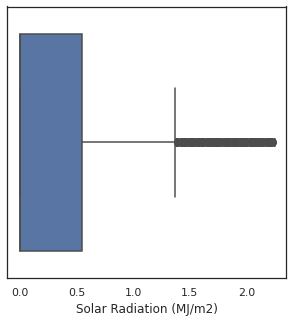

In [106]:
plt.figure(figsize = (5,5))
sns.boxplot(df['Solar Radiation (MJ/m2)'])
plt.show()

In [107]:
Q1 , Q2, Q3 = np.percentile(df['Solar Radiation (MJ/m2)'],[25,50,75])
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
print(low_lim , up_lim)

-0.8250000000000001 1.375


In [108]:
df = df[df['Solar Radiation (MJ/m2)']<up_lim]
df = df[df['Solar Radiation (MJ/m2)']>low_lim]

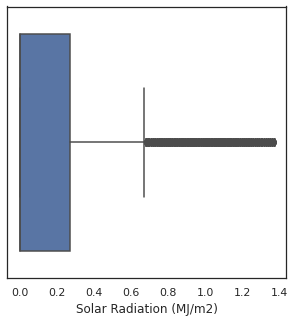

In [109]:
plt.figure(figsize = (5,5))
sns.boxplot(df['Solar Radiation (MJ/m2)'])
plt.show()

##Constructing Correlation

In [110]:
df_corr = df.corr()
df_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind_speed_(m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.413976,0.532855,-0.159307,0.126226,0.199631,0.379803,0.255742,-0.120215,-0.134976
Hour,0.413976,1.000000,0.100760,-0.219490,0.280297,0.088072,-0.004335,0.145541,0.014151,-0.013041
Temperature(C),0.532855,0.100760,1.000000,0.316524,-0.106157,-0.005552,0.936724,0.149371,0.077181,-0.217478
Humidity(%),-0.159307,-0.219490,0.316524,1.000000,-0.273316,-0.559303,0.618478,-0.300187,0.240281,0.090595
Wind_speed_(m/s),0.126226,0.280297,-0.106157,-0.273316,1.000000,0.160712,-0.194859,0.240266,-0.005392,0.017617
Visibility (10m),0.199631,0.088072,-0.005552,-0.559303,0.160712,1.000000,-0.197918,0.094136,-0.169697,-0.119753
Dew point temperature(C),0.379803,-0.004335,0.936724,0.618478,-0.194859,-0.197918,1.000000,0.001558,0.140568,-0.153194
Solar Radiation (MJ/m2),0.255742,0.145541,0.149371,-0.300187,0.240266,0.094136,0.001558,1.000000,-0.051222,-0.010006
Rainfall(mm),-0.120215,0.014151,0.077181,0.240281,-0.005392,-0.169697,0.140568,-0.051222,1.000000,0.004419
Snowfall (cm),-0.134976,-0.013041,-0.217478,0.090595,0.017617,-0.119753,-0.153194,-0.010006,0.004419,1.000000


##Ploting HeatMap using seaborn library

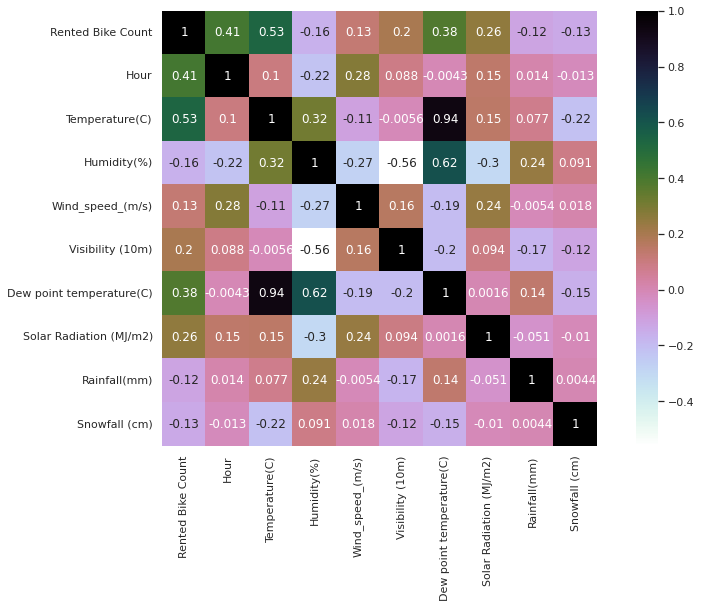

In [111]:
plt.figure(figsize= (14,8))
sns.heatmap(df_corr,annot = True, cmap = 'cubehelix_r',square = True)
plt.show()

In [112]:
data_corr = df_corr['Rented Bike Count'][:-1]
data_corr[abs(data_corr)>=0.30].sort_values(ascending = True)

Dew point temperature(C)    0.379803
Hour                        0.413976
Temperature(C)              0.532855
Rented Bike Count           1.000000
Name: Rented Bike Count, dtype: float64

In [113]:

data_corr

Rented Bike Count           1.000000
Hour                        0.413976
Temperature(C)              0.532855
Humidity(%)                -0.159307
Wind_speed_(m/s)            0.126226
Visibility (10m)            0.199631
Dew point temperature(C)    0.379803
Solar Radiation (MJ/m2)     0.255742
Rainfall(mm)               -0.120215
Name: Rented Bike Count, dtype: float64

##Creating Variable With Columns

In [114]:
df.columns


Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind_speed_(m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [115]:
#df.loc[df.Date == '24/11/2018']

In [116]:
x = df.drop(['Rented Bike Count'],axis=1)
y = df['Rented Bike Count']


##Spliting DataSet For Training and Testing 

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.20)



##Importing Linear Regression

In [118]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

##Testing Data

In [119]:
mode_pred=model.predict(X_test)

##Checking Accuracy Score

In [120]:
model_score=model.score(X_test,Y_test)
print("Our Accuracy Score: ",model_score)

Our Accuracy Score:  0.5115361326583835


##Checking R2 score


In [121]:
from sklearn.metrics import r2_score

print('R_Squared Score of linear regression:',r2_score(Y_test,mode_pred))


R_Squared Score of linear regression: 0.5115361326583835


##Using Ridge & Lasso Trying to Increase Accuaracy Score

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X_train, Y_train)
ridge_score = ridge.score(X_test, Y_test)

print("Accuracy Using ridge: ",ridge_score)

Accuracy Using ridge:  0.5115445133189298


In [124]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, Y_train)
lasso_score = lasso.score(X_test, Y_test)

print("Accuracy Using lasso: ",lasso_score)

Accuracy Using lasso:  0.5119515584922689
